In [9]:
# base
import os
import shutil
import random
import numpy as np
import time
from collections import Counter
from sklearn.metrics import mean_squared_error

# data preprocessing
import pandas as pd
pd.set_option('max_columns', 130, 'max_rows', 30)

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# ignore warining
import warnings
warnings.filterwarnings('ignore')


#import folium # 지도 관련 시각화
#from folium.plugins import MarkerCluster #지도 관련 시각화
#import geopy.distance #거리 계산해주는 패키지 사용


# save
#from sklearn.externals import joblib 
#import pickle

# selenium
from selenium.webdriver import Chrome

#import geopy.distance

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#from sklearn.externals import joblib 
import pickle

import random
random.seed(42)

import lightgbm as lgb
from keras import metrics
from sklearn.metrics import r2_score

In [19]:
train = pd.read_csv("C:/Users/MEDICI/Downloads/bus_data/train.csv")
test = pd.read_csv("C:/Users/MEDICI/Downloads/bus_data/test.csv")
bts =  pd.read_csv("C:/Users/MEDICI/Downloads/bus_data/bus_bts.csv")

In [16]:
bts =  pd.read_csv("C:/Users/MEDICI/Downloads/bus_data/bus_bts.csv")

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1010000000000000.0,23000000,149793674,2019-09-10,6:34:45,360,?명삎?ㅺ굅由?2019-09-10,7:10:31,592,?붾턿珥덈벑?숆탳,1,1.0,NaN
1,1010000000000000.0,23000000,149793674,2019-09-10,6:34:58,360,?명삎?ㅺ굅由?2019-09-10,6:56:27,3273,怨좎궛?숈궛(愿묒뼇諛⑸㈃),1,1.0,NaN
2,1020000000000000.0,21420000,149793535,2019-09-10,7:19:07,2495,?숆킅?섏듅?뺣쪟??(?쒖＜諛⑸㈃),2019-09-10,7:40:29,431,?뺤〈留덉쓣,4.0,1.0
3,1020000000000000.0,21420000,149793512,2019-09-09,9:14:47,3282,??뺥솚?뱀젙瑜섏옣(??뺤쓭?щТ??,2019-09-09,10:02:46,431,?뺤〈留덉쓣,1.0,1.0
4,1010000000000000.0,21420000,149793512,2019-09-09,9:28:53,2820,?쇱젙吏?먮?,2019-09-09,10:21:37,2972,?쒖＜援?젣怨듯빆(醫낆젏),4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1010000000000000.0,25000000.0,149797507.0,2019-09-09,9:41:09,1812.0,?쇱꽦?ъ옄怨좊벑?숆탳,2019-09-09,9:57:54,1832,?ㅽ넻紐⑤（,6.0,1.0
1048571,1010000000000000.0,25000000.0,149797507.0,2019-09-09,9:50:28,1846.0,怨듭쿇??2019-09-09,9:53:40,1839,??붾룞,1,1.0,NaN
1048572,1010000000000000.0,25000000.0,149797507.0,2019-09-09,9:54:07,1839.0,??붾룞,2019-09-09,9:57:01,1834,?곸썝??6,1.0,NaN
1048573,1010000000000000.0,25000000.0,149797507.0,2019-09-09,9:55:13,1837.0,?꾨?1由ъ궗臾댁냼,2019-09-09,9:57:03,1834,?곸썝??6,1.0,NaN


In [45]:
for col in train.columns:
    print(str(col) + ":", train[col].isnull().sum() )

id: 0
date: 0
bus_route_id: 0
in_out: 0
station_code: 0
station_name: 0
latitude: 0
longitude: 0
6~7_ride: 0
7~8_ride: 0
8~9_ride: 0
9~10_ride: 0
10~11_ride: 0
11~12_ride: 0
6~7_takeoff: 0
7~8_takeoff: 0
8~9_takeoff: 0
9~10_takeoff: 0
10~11_takeoff: 0
11~12_takeoff: 0
18~20_ride: 0
weekday: 0
route_station: 0
bus_route_id_weekday: 0
station_code_weekday: 0
route_station_weekday: 0


In [46]:
for col in test.columns:
    print(str(col) + ":", test[col].isnull().sum() )

id: 0
date: 0
bus_route_id: 0
in_out: 0
station_code: 0
station_name: 0
latitude: 0
longitude: 0
6~7_ride: 0
7~8_ride: 0
8~9_ride: 0
9~10_ride: 0
10~11_ride: 0
11~12_ride: 0
6~7_takeoff: 0
7~8_takeoff: 0
8~9_takeoff: 0
9~10_takeoff: 0
10~11_takeoff: 0
11~12_takeoff: 0
weekday: 0
route_station: 0
bus_route_id_weekday: 0
station_code_weekday: 0
route_station_weekday: 0


In [24]:
train['date'] = pd.to_datetime(train['date'])
train['weekday'] = train['date'].dt.weekday

test['date'] = pd.to_datetime(test['date'])
test['weekday'] = test['date'].dt.weekday

train.shape, test.shape

((415423, 22), (228170, 21))

In [63]:
train = pd.get_dummies(train,columns=['weekday'])
test = pd.get_dummies(test,columns=['weekday'])

In [64]:
train['in_out'] = train['in_out'].map({'시내':0,'시외':1})
test['in_out'] = test['in_out'].map({'시내':0,'시외':1})

In [65]:
train['68r']=train['6~7_ride']+train['7~8_ride'] # 6 ~ 8시 승차인원
train['810r']=train['8~9_ride']+train['9~10_ride']
train['1012r']=train['10~11_ride']+train['11~12_ride']

train['68t']=train['6~7_takeoff']+train['7~8_takeoff'] # 6 ~ 8시 하차인원
train['810t']=train['8~9_takeoff']+train['9~10_takeoff']
train['1012t']=train['10~11_takeoff']+train['11~12_takeoff']

Text(0.5, 1.0, 'arrive and leave correlation graph')

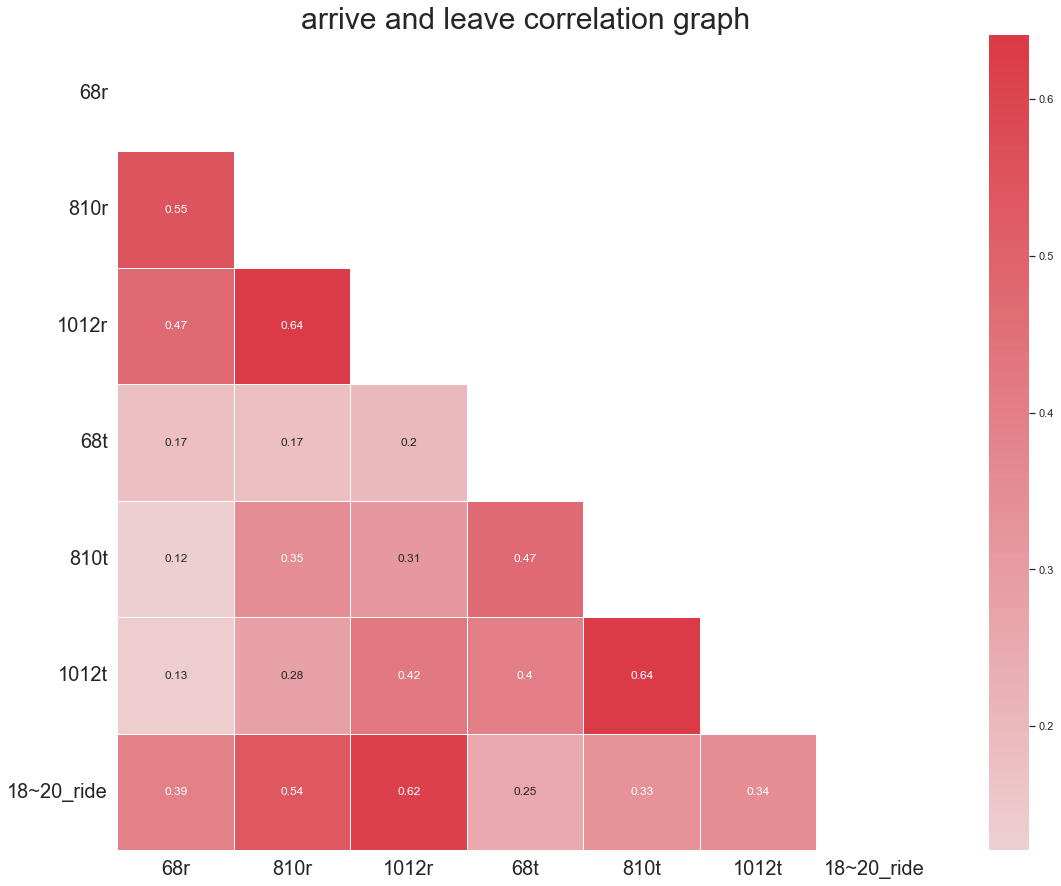

In [67]:
train22 = train[['68r', '810r', '1012r', '68t', '810t', '1012t', '18~20_ride']]

cor = train22.corr()

sns.set(style="white")
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(cor,
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 1},
            annot=True)
#히트맵 생성
plt.xticks(size=20)
plt.yticks(size=20, rotation=0)
plt.title("arrive and leave correlation graph", size=30)

In [68]:
test['68r']=test['6~7_ride']+test['7~8_ride']
test['810r']=test['8~9_ride']+test['9~10_ride']
test['1012r']=test['10~11_ride']+test['11~12_ride']

test['68t']=test['6~7_takeoff']+test['7~8_takeoff']
test['810t']=test['8~9_takeoff']+test['9~10_takeoff']
test['1012t']=test['10~11_takeoff']+test['11~12_takeoff']

In [80]:
# 해당 주요 장소의 임의 지역 위도, 경도

!pip install folium
import folium

jeju=(33.51411, 126.52969) # 제주 측정소 근처
gosan=(33.29382, 126.16283) #고산 측정소 근처
seongsan=(33.38677, 126.8802) #성산 측정소 근처
po=(33.24616, 126.5653) #서귀포 측정소 근처


In [94]:
import geopy.distance


t1 = [geopy.distance.vincenty( (i,j), jeju).km for i,j in list( zip( train['latitude'],train['longitude'] )) ]
t2 = [geopy.distance.vincenty( (i,j), gosan).km for i,j in list( zip( train['latitude'],train['longitude'] )) ]
t3 = [geopy.distance.vincenty( (i,j), seongsan).km for i,j in list( zip( train['latitude'],train['longitude'] )) ]
t4 = [geopy.distance.vincenty( (i,j), po).km for i,j in list( zip( train['latitude'],train['longitude'] )) ]

train['dis_jeju']=t1
train['dis_gosan']=t2
train['dis_seongsan']=t3
train['dis_po']=t4

AttributeError: module 'geopy.distance' has no attribute 'vincenty'

In [33]:
train['bus_route_id'] = train['bus_route_id'].astype(str)
train['station_code'] = train['station_code'].astype(str)
train['route_station'] = train['bus_route_id'] + ',' + train['station_code']

test['bus_route_id'] = test['bus_route_id'].astype(str)
test['station_code'] = test['station_code'].astype(str)
test['route_station'] = test['bus_route_id'] + ',' + test['station_code']

train.shape, test.shape

((415423, 26), (228170, 25))

In [26]:
train['bus_route_id_weekday'] = train['bus_route_id'].astype(str) + ',' + train['weekday'].astype(str) 
test['bus_route_id_weekday'] = test['bus_route_id'].astype(str) + ',' + test['weekday'].astype(str) 

train.shape, test.shape

((415423, 24), (228170, 23))

In [27]:
train['station_code_weekday'] = train['station_code'].astype(str) + ',' + train['weekday'].astype(str)
test['station_code_weekday'] = test['station_code'].astype(str) + ',' + test['weekday'].astype(str)

train.shape, test.shape

((415423, 25), (228170, 24))

In [28]:
train['route_station_weekday'] = train['route_station'].astype(str) + ',' + train['weekday'].astype(str) 
test['route_station_weekday'] = test['route_station'].astype(str) + ',' + test['weekday'].astype(str)

train.shape, test.shape

((415423, 26), (228170, 25))